**1. 一元线性回归 (Simple Linear Regression)**

假设我们有一个包含 $n$ 个数据点的训练集 $\{(x_i, y_i)\}_{i=1}^{n}$，其中 $x_i$ 是输入特征，$y_i$ 是对应的输出标签。一元线性回归的目标是找到一条直线，能够最好地拟合这些数据点。这条直线的方程可以表示为：

$$h_\theta(x) = \theta_0 + \theta_1 x$$

其中，$\theta_0$ 是截距（bias），$\theta_1$ 是斜率（weight）。我们的目标是找到合适的 $\theta_0$ 和 $\theta_1$ 使得预测值 $h_\theta(x_i)$ 尽可能接近真实值 $y_i$。

**1.1. 代价函数 (Cost Function)**

我们使用均方误差 (Mean Squared Error, MSE) 作为衡量模型预测性能的代价函数：

$$J(\theta_0, \theta_1) = \frac{1}{2n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)^2$$

将线性回归模型的方程代入代价函数：

$$J(\theta_0, \theta_1) = \frac{1}{2n} \sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i)^2$$

我们的目标是找到使 $J(\theta_0, \theta_1)$ 最小的 $\theta_0$ 和 $\theta_1$。

**1.2. 梯度下降 (Gradient Descent)**

梯度下降是一种迭代优化算法，通过不断更新参数来最小化代价函数。更新规则如下：

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) \quad \text{for } j = 0, 1$$

其中，$\alpha$ 是学习率，控制着每次迭代参数更新的步长。我们需要计算代价函数对 $\theta_0$ 和 $\theta_1$ 的偏导数。

**计算偏导数：**

$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{\partial}{\partial \theta_0} \left( \frac{1}{2n} \sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i)^2 \right)$
$= \frac{1}{2n} \sum_{i=1}^{n} 2 (\theta_0 + \theta_1 x_i - y_i) \cdot \frac{\partial}{\partial \theta_0} (\theta_0 + \theta_1 x_i - y_i)$
$= \frac{1}{n} \sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i) \cdot 1$
$= \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{\partial}{\partial \theta_1} \left( \frac{1}{2n} \sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i)^2 \right)$
$= \frac{1}{2n} \sum_{i=1}^{n} 2 (\theta_0 + \theta_1 x_i - y_i) \cdot \frac{\partial}{\partial \theta_1} (\theta_0 + \theta_1 x_i - y_i)$
$= \frac{1}{n} \sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i) \cdot x_i$
$= \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i) x_i$

**梯度下降更新规则：**

$$\theta_0 := \theta_0 - \alpha \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)$$
$$\theta_1 := \theta_1 - \alpha \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i) x_i$$

通过不断迭代更新 $\theta_0$ 和 $\theta_1$，代价函数 $J(\theta_0, \theta_1)$ 会逐渐减小，直到收敛到一个局部最小值（对于线性回归，这是一个全局最小值）。

**1.3. 正规方程 (Normal Equation)**

正规方程提供了一种直接计算出最优参数 $\theta_0$ 和 $\theta_1$ 的解析方法，不需要迭代。对于一元线性回归，可以直接通过对代价函数求偏导并令其等于零来求解。

将代价函数对 $\theta_0$ 和 $\theta_1$ 的偏导数设置为零：

$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{n} \sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i) = 0$
$\sum_{i=1}^{n} \theta_0 + \theta_1 \sum_{i=1}^{n} x_i - \sum_{i=1}^{n} y_i = 0$
$n \theta_0 + \theta_1 \sum_{i=1}^{n} x_i = \sum_{i=1}^{n} y_i \quad (1)$

$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{n} \sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i) x_i = 0$
$\sum_{i=1}^{n} (\theta_0 x_i + \theta_1 x_i^2 - y_i x_i) = 0$
$\theta_0 \sum_{i=1}^{n} x_i + \theta_1 \sum_{i=1}^{n} x_i^2 = \sum_{i=1}^{n} y_i x_i \quad (2)$

这是一个关于 $\theta_0$ 和 $\theta_1$ 的二元一次方程组。我们可以通过解这个方程组来得到最优的 $\theta_0$ 和 $\theta_1$。

从方程 (1) 中解出 $\theta_0$:
$\theta_0 = \frac{1}{n} \sum_{i=1}^{n} y_i - \theta_1 \frac{1}{n} \sum_{i=1}^{n} x_i = \bar{y} - \theta_1 \bar{x}$
其中，$\bar{y}$ 是 $y_i$ 的均值，$\bar{x}$ 是 $x_i$ 的均值。

将 $\theta_0$ 代入方程 (2):
$(\bar{y} - \theta_1 \bar{x}) \sum_{i=1}^{n} x_i + \theta_1 \sum_{i=1}^{n} x_i^2 = \sum_{i=1}^{n} y_i x_i$
$\bar{y} \sum_{i=1}^{n} x_i - \theta_1 \bar{x} \sum_{i=1}^{n} x_i + \theta_1 \sum_{i=1}^{n} x_i^2 = \sum_{i=1}^{n} y_i x_i$
$\theta_1 (\sum_{i=1}^{n} x_i^2 - \bar{x} \sum_{i=1}^{n} x_i) = \sum_{i=1}^{n} y_i x_i - \bar{y} \sum_{i=1}^{n} x_i$
$\theta_1 (\sum_{i=1}^{n} x_i^2 - n \bar{x}^2) = \sum_{i=1}^{n} y_i x_i - n \bar{y} \bar{x}$

因此，斜率 $\theta_1$ 的最优解为：
$$\theta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{Cov(x, y)}{Var(x)}$$

截距 $\theta_0$ 的最优解为：
$$\theta_0 = \bar{y} - \theta_1 \bar{x}$$


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
# 示例数据集
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
n = len(X)

In [41]:
X

array([1, 2, 3, 4, 5])

In [42]:
y

array([2, 4, 5, 4, 5])

In [43]:
n

5

线性回归模型

$$h_\theta(x) = \theta_0 + \theta_1 x$$

（1）$\theta_0 ：$代价函数的梯度（导数）

$$\theta_0 = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)$$

（2）$\theta_1 ：$代价函数的梯度（导数）

$$\theta_1 = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i) x_i$$

$$\theta_0 = \theta_0 - \alpha \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)$$

$$\theta_1 = \theta_1 - \alpha \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i) x_i$$

In [44]:
# -------------------- 梯度下降实现 (Gradient Descent) --------------------
theta_0_gd = 0 # 初始化参数
theta_1_gd = 0 # 初始化参数
learning_rate = 0.01 # 学习率
iterations = 1000 # 迭代次数

for i in range(iterations):
    y_predicted = theta_0_gd + theta_1_gd * X # 预测值

    d_theta_0 = (1/n) * np.sum(y_predicted - y) # 计算梯度

    d_theta_1 = (1/n) * np.sum((y_predicted - y) * X) # 计算梯度

    theta_0_gd = theta_0_gd - learning_rate * d_theta_0 # 更新参数

    theta_1_gd = theta_1_gd - learning_rate * d_theta_1 # 更新参数


In [45]:
print("\n梯度下降结果:")
print(f"theta_0 (截距): {theta_0_gd:.4f}")
print(f"theta_1 (斜率): {theta_1_gd:.4f}")


梯度下降结果:
theta_0 (截距): 1.8521
theta_1 (斜率): 0.6964


斜率 $\theta_1$ 的最优解为：
$\theta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{Cov(x, y)}{Var(x)}$

截距 $\theta_0$ 的最优解为：
$\theta_0 = \bar{y} - \theta_1 \bar{x}$

$$
\theta_{(0,1)} = (X^T X)^{-1} X^T y 
$$
1. 变量含义：
   - $ X_b $ ：设计矩阵（Design Matrix），包含所有样本的特征值，通常添加了一列全1的偏置项（例如形状为$m \times (n+1)$ ，其中$m$是样本数，$n$是特征数）。
   - $y_{col}$：目标变量向量（形状为$m \times 1$）。
   - $\theta_{best}$：最优参数向量（形状为$(n+1) \times 1$）。
 
2. 数学步骤：
   - $X_b^T \cdot X_b$：计算特征矩阵的转置与其自身的乘积，得到$(n+1) \times (n+1)$的对称矩阵。
   - 求逆操作：`np.linalg.inv()`对上述矩阵求逆，得到$(X^T X)^{-1}$。
   - 矩阵连乘：将逆矩阵与$X_b^T \cdot y$相乘，最终得到$\theta$的最优解。
 
3. 公式推导背景：
   该公式通过最小化均方误差损失函数推导而来，即：
   $$
   J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2
   $$
   其中$h_\theta(x) = \theta^T x$。对$\theta$求导并令导数为零，即可推导出正规方程。

In [46]:
# -------------------- 正规方程实现 (Normal Equation) --------------------
X_b = np.c_[np.ones((n, 1)), X]
y_col = y.reshape(-1, 1)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_col) # 正规方程
theta_0_ne = theta_best[0][0]
theta_1_ne = theta_best[1][0]

In [47]:
X_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [48]:
y_col

array([[2],
       [4],
       [5],
       [4],
       [5]])

In [49]:
theta_best

array([[2.2],
       [0.6]])

In [50]:
theta_0_ne

np.float64(2.200000000000004)

In [51]:
theta_1_ne

np.float64(0.6000000000000005)

In [52]:
print("\n正规方程结果:")
print(f"theta_0 (截距): {theta_0_ne:.4f}")
print(f"theta_1 (斜率): {theta_1_ne:.4f}")


正规方程结果:
theta_0 (截距): 2.2000
theta_1 (斜率): 0.6000


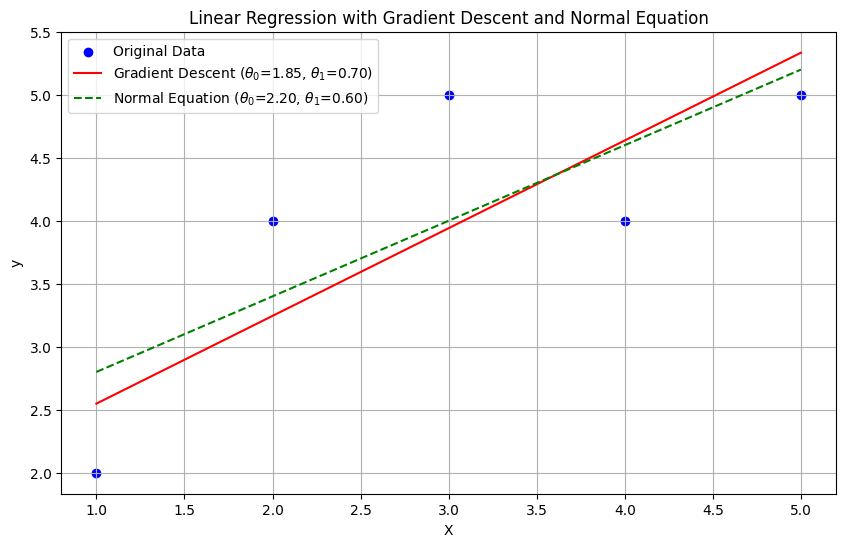

In [53]:
# -------------------- 图像化呈现 --------------------
plt.figure(figsize=(10, 6)) # 设置图像大小

# 绘制原始数据点
plt.scatter(X, y, color='blue', label='Original Data')

# 绘制梯度下降的回归线
y_pred_gd = theta_0_gd + theta_1_gd * X
plt.plot(X, y_pred_gd, color='red', label=f'Gradient Descent ($\\theta_0$={theta_0_gd:.2f}, $\\theta_1$={theta_1_gd:.2f})')

# 绘制正规方程的回归线
y_pred_ne = theta_0_ne + theta_1_ne * X 
plt.plot(X, y_pred_ne, color='green', linestyle='--', label=f'Normal Equation ($\\theta_0$={theta_0_ne:.2f}, $\\theta_1$={theta_1_ne:.2f})')

# 添加标签和标题
plt.xlabel('X') # 设置x轴标签
plt.ylabel('y') # 设置y轴标签
plt.title('Linear Regression with Gradient Descent and Normal Equation')
plt.legend() # 添加图例
plt.grid(True) # 添加网格线
plt.show() # 显示图像

In [54]:
# -------------------- 模型评估 --------------------

# 计算梯度下降模型的指标
mse_gd = mean_squared_error(y, y_pred_gd) # 计算均方误差
mae_gd = mean_absolute_error(y, y_pred_gd) # 计算平均绝对误差
r2_gd = r2_score(y, y_pred_gd)

# 计算正规方程模型的指标
mse_ne = mean_squared_error(y, y_pred_ne) # 计算均方误差
mae_ne = mean_absolute_error(y, y_pred_ne) # 计算平均绝对误差
r2_ne = r2_score(y, y_pred_ne)

print("\n梯度下降模型评估:")
print(f"MSE: {mse_gd:.4f}, MAE: {mae_gd:.4f}, R²: {r2_gd:.4f}")
print("\n正规方程模型评估:")
print(f"MSE: {mse_ne:.4f}, MAE: {mae_ne:.4f}, R²: {r2_ne:.4f}")





梯度下降模型评估:
MSE: 0.5020, MAE: 0.6668, R²: 0.5816

正规方程模型评估:
MSE: 0.4800, MAE: 0.6400, R²: 0.6000


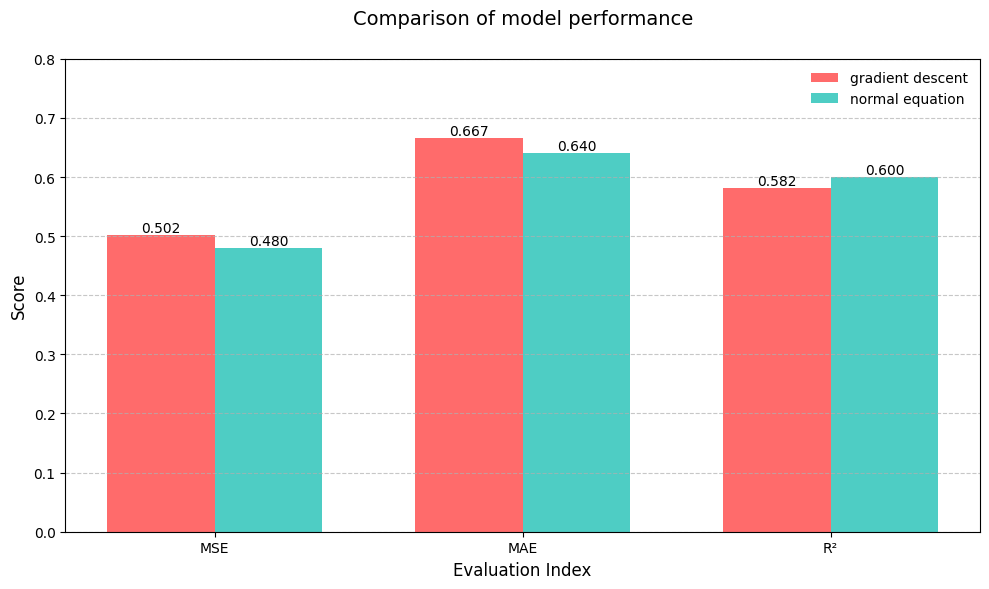

In [57]:
# -------------------- 评估指标可视化 --------------------
metrics = ['MSE', 'MAE', 'R²']
gd_scores = [mse_gd, mae_gd, r2_gd] # 梯度下降模型的评估指标
ne_scores = [mse_ne, mae_ne, r2_ne] # 正规方程模型的评估指标

x = np.arange(len(metrics))  # 指标标签位置
width = 0.35  # 柱状图宽度

plt.figure(figsize=(10, 6))
rects1 = plt.bar(x - width/2, gd_scores, width, label='gradient descent', color='#FF6B6B')
rects2 = plt.bar(x + width/2, ne_scores, width, label='normal equation', color='#4ECDC4')

# 添加标签和美化
plt.title('Comparison of model performance', fontsize=14, pad=25) 
plt.xlabel('Evaluation Index', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(x, metrics)
plt.ylim(0, max(max(gd_scores), max(ne_scores)) * 1.2)

# 在柱子上方显示数值
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.legend(frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()